<a href="https://colab.research.google.com/github/LukaLoncar98/GAN/blob/main/LukaLoncarGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rqXgmTNnkjR050dH5cUMPF97cfo8LVQ5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1rqXgmTNnkjR050dH5cUMPF97cfo8LVQ5" -O all-dogs.zip && rm -rf /tmp/cookies.txt

--2021-06-12 19:47:02--  https://docs.google.com/uc?export=download&confirm=OWwG&id=1rqXgmTNnkjR050dH5cUMPF97cfo8LVQ5
Resolving docs.google.com (docs.google.com)... 74.125.23.100, 74.125.23.113, 74.125.23.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/1nmgah1lad951q0npj21tiou9ncv6lcc/vs5qu91v5uij2bi9kva1te0sn82r0i9m/1623527175000/16696552056194870990/16469588824672194240Z/1rqXgmTNnkjR050dH5cUMPF97cfo8LVQ5?e=download [following]
--2021-06-12 19:47:02--  https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/1nmgah1lad951q0npj21tiou9ncv6lcc/vs5qu91v5uij2bi9kva1te0sn82r0i9m/1623527175000/16696552056194870990/16469588824672194240Z/1rqXgmTNnkjR050dH5cUMPF97cfo8LVQ5?e=download
Resolving doc-0g-3g-docs.googleusercontent.com (doc-0g-3g-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to 

In [6]:

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XpnK2x8mzxP0UJhrDFFYSbQpLj-AzvMP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XpnK2x8mzxP0UJhrDFFYSbQpLj-AzvMP" -O Annotation.zip && rm -rf /tmp/cookies.txt

--2021-06-12 19:50:26--  https://docs.google.com/uc?export=download&confirm=TlXp&id=1XpnK2x8mzxP0UJhrDFFYSbQpLj-AzvMP
Resolving docs.google.com (docs.google.com)... 64.233.188.139, 64.233.188.101, 64.233.188.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-3c-docs.googleusercontent.com/docs/securesc/9db22uoupddh856vr7int94g2ht6veep/hmh6hauosl2nk7j184qag7vu1n393uj4/1623527400000/16696552056194870990/17781348036968035321Z/1XpnK2x8mzxP0UJhrDFFYSbQpLj-AzvMP?e=download [following]
--2021-06-12 19:50:26--  https://doc-0o-3c-docs.googleusercontent.com/docs/securesc/9db22uoupddh856vr7int94g2ht6veep/hmh6hauosl2nk7j184qag7vu1n393uj4/1623527400000/16696552056194870990/17781348036968035321Z/1XpnK2x8mzxP0UJhrDFFYSbQpLj-AzvMP?e=download
Resolving doc-0o-3c-docs.googleusercontent.com (doc-0o-3c-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting

In [7]:
!unzip all-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: all-dogs/n02113624_8890.jpg  
  inflating: all-dogs/n02107683_215.jpg  
  inflating: all-dogs/n02093428_5326.jpg  
  inflating: all-dogs/n02105412_8018.jpg  
  inflating: all-dogs/n02093647_3129.jpg  
  inflating: all-dogs/n02088466_8078.jpg  
  inflating: all-dogs/n02108915_4214.jpg  
  inflating: all-dogs/n02089078_2841.jpg  
  inflating: all-dogs/n02105855_3498.jpg  
  inflating: all-dogs/n02094114_2823.jpg  
  inflating: all-dogs/n02088094_649.jpg  
  inflating: all-dogs/n02091831_2232.jpg  
  inflating: all-dogs/n02096585_3105.jpg  
  inflating: all-dogs/n02109961_977.jpg  
  inflating: all-dogs/n02097047_5869.jpg  
  inflating: all-dogs/n02106030_16250.jpg  
  inflating: all-dogs/n02110958_13721.jpg  
  inflating: all-dogs/n02107142_8437.jpg  
  inflating: all-dogs/n02094433_1312.jpg  
  inflating: all-dogs/n02097474_5481.jpg  
  inflating: all-dogs/n02097130_1531.jpg  
  inflating: all-dogs/n02092339_284.jpg  
  inf

In [8]:
!unzip Annotation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Annotation/n02088094-Afghan_hound/n02088094_5285  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_5285  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_4501  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_4501  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_13442  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_13442  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_8764  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_8764  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3982  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3982  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3949  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3949  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_1410  
  inflating: __MACOSX/Annotation/n02088094-Afghan

In [9]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.compat.v1.keras.layers import BatchNormalization

In [10]:
# Funkcija koja vraća set validnih formata fotografija
def list_images(basePath, contains=None):
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=contains)

# Funkcija za prolaz kroz fajlove
def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None):
    # petlja preko strukture direktorijuma
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # petlja preko imena datoteka u trenutnom direktorijumu
        for filename in filenames:
            # ignorisanje fajla ukoliko contains nije none i ukoliko ne sadrži dati string
            if contains is not None and filename.find(contains) == -1:
                continue

            # odredite ekstenziju trenutne datoteke
            ext = filename[filename.rfind("."):].lower()

            # proverite da li je datoteka fotografija i treba li je obraditi
            if ext.endswith(validExts):
                # konstruisati put do fotografije 
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath

# Funkcija za učitavanje fotografija 
def load_images(directory='', size=(64,64)):
    images = []
    labels = []  # int brojevi koji odgovaraju kategorijama po abecednom redu
    label = 0
    
    imagePaths = list(list_images(directory))
    
    for path in imagePaths:
        
        if not('OSX' in path):
        
            path = path.replace('\\','/')

            # Učitavanje fotografije i promena veličine (za slučaj da nisu sve iste veličine)
            image = cv2.imread(path) 
            image = cv2.resize(image,size) 

            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    return images

In [12]:
images=load_images('./all-dogs')

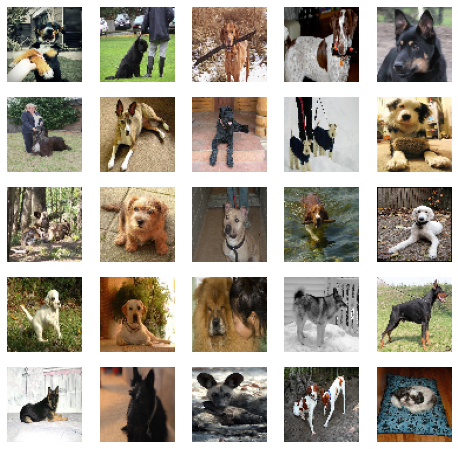

In [13]:
_,ax = plt.subplots(5,5, figsize = (8,8)) 
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(images[5*i+j])
        ax[i,j].axis('off')

In [16]:

class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Kreiranje generatora - velika jezgra u konvolucionim slojevima omogućavaju mreži da stvara složene strukture
    def build_generator(self):
        epsilon = 0.00001 # Decimala je dodata varijansi kako bi se izbeglo deljenje sa nulom u slojevima BatchNorm.
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512)))
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        # Standardno aktiviranje za generator GAN-a
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    # Kreiranje diskriminatora
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    # Funkcija za trening
    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(images)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Trening diskriminatora
            # Gubitak diskriminatora je srednja vrednost gubitaka tokom treninga na autentičnim i lažnim fotografijama
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

            # Trening generatora
            noise = np.random.normal(0, 1, (batch_size, self.noise_size))

            valid_y = np.array([1] * batch_size)
            g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss

            """
            Gubitke i tačnost mreža ispisujemo svakih 200 serija uglavnom da bismo bili sigurni da tačnost diskriminatora 
            nije stabilna na oko 50% ili 100% (što bi značilo da diskriminator ne radi dovoljno dobro ili previše dobro)
            """
            if epoch % metrics_update == 0:
                print ("%d [Discriminator loss: %f, acc.: %.2f%%] [Generator loss: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Čuvanje 25 fotografija
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Čuvamo arhitekturu modela, težine i stanje optimizatora
            # Na ovaj način možemo ponovo pokrenuti trening tačno tamo gde smo stali
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    # Čuvanje 25 generisanih fotografija kako bi se prikazao spektar fotografija kreiranih od strane generatora
    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        # Rescale from [-1,1] into [0,1]
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("dogsGenerated/n02085620_%d.png" % epoch)
        plt.close()

In [17]:
!mkdir dogsGenerated

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 128)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 128)       0

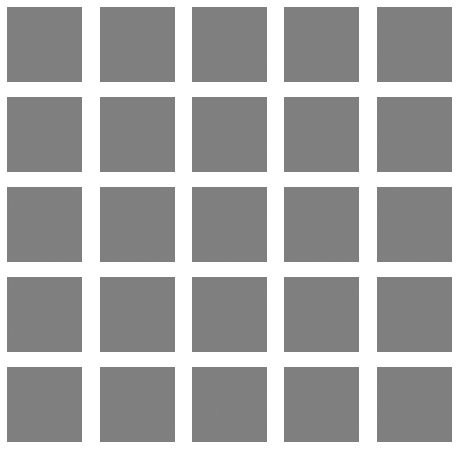

INFO:tensorflow:Assets written to: generator_0/assets
INFO:tensorflow:Assets written to: discriminator_0/assets
200 [Discriminator loss: 0.427006, acc.: 83.39%] [Generator loss: 2.776766]


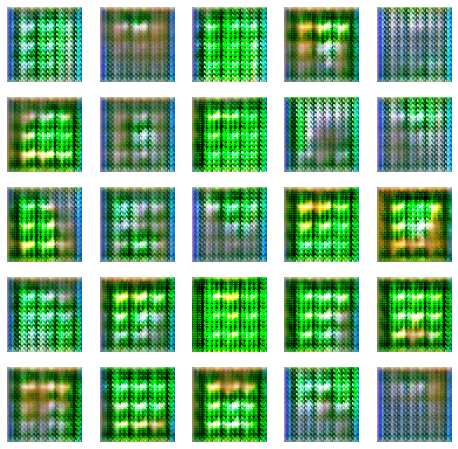

400 [Discriminator loss: 0.315579, acc.: 87.22%] [Generator loss: 3.287035]
600 [Discriminator loss: 0.353438, acc.: 85.11%] [Generator loss: 3.232963]


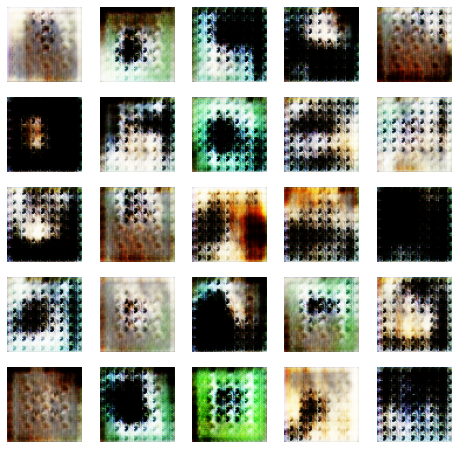

800 [Discriminator loss: 0.344420, acc.: 85.42%] [Generator loss: 2.536718]


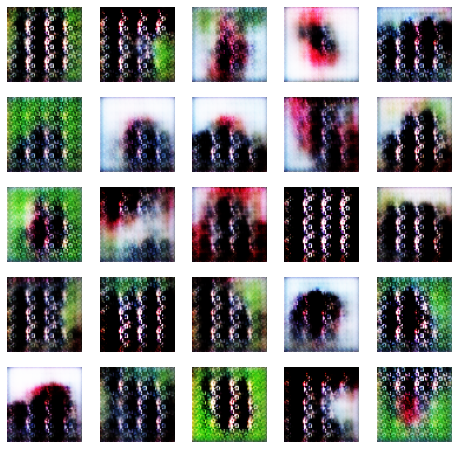

1000 [Discriminator loss: 0.264913, acc.: 90.01%] [Generator loss: 2.317851]
1200 [Discriminator loss: 0.283056, acc.: 88.91%] [Generator loss: 2.181512]


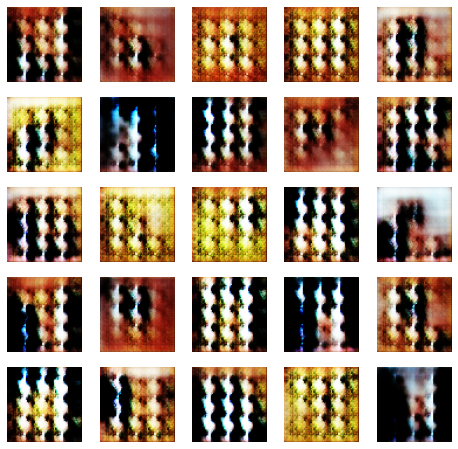

1400 [Discriminator loss: 0.268351, acc.: 89.65%] [Generator loss: 2.753316]


In [18]:
# Instanciranje GAN klase i treniranje modela

gan=GAN()
gan.train(epochs=1500, batch_size=256, metrics_update=200, save_images=300, save_model=1500)